# Exploration

## Imports

In [1]:
# Standard imports
import numpy as np
import pandas as pd

# My imports
import wrangle as w
import explore as e

# Viz imports
import matplotlib.pyplot as plt
import seaborn as sns

import pydataset



# Need to add this line to get plots to show!
%matplotlib inline

# Stats
from scipy import stats
import sklearn.preprocessing
from scipy.stats import pearsonr, spearmanr
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Exercises

Our Zillow scenario continues:

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data **to predict property values** using some of their available features; who knows, you might even do some feature engineering to blow them away. **Your goal is to predict the values of single unit properties using the observations from 2017.**

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

### 1. As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

### 2. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [2]:
df = w.get_zillow_data()
df

csv file found and loaded


,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county,tax_rate
4,4,2.0,3633,296425,2005,6941.39,LA,0.02
6,3,4.0,1620,847770,2011,10244.94,LA,0.01
7,3,2.0,2077,646760,1926,7924.68,LA,0.01
11,0,0.0,1200,5328,1972,91.60,LA,0.02
14,0,0.0,171,6920,1973,255.17,LA,0.04
...,...,...,...,...,...,...,...,...
2152856,4,4.0,4375,422400,2015,13877.56,LA,0.03
2152858,4,3.0,2262,960756,2015,13494.52,Orange,0.01
2152859,4,4.5,3127,536061,2014,6244.16,Orange,0.01
2152861,3,2.5,1974,424353,2015,5302.70,Orange,0.01


In [3]:
train, validate, test = w.get_zillow_split(df)

In [4]:
train.head()

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county,tax_rate
1571798,4,2.5,2987,885000,2006,13617.38,Orange,0.02
1723553,3,2.0,3013,489511,1977,5768.57,LA,0.01
718174,4,3.0,2572,390915,1986,4944.11,LA,0.01
1663205,3,1.0,1589,321758,1959,4031.78,LA,0.01
1087891,3,2.0,1727,231737,1962,2708.80,Ventura,0.01


In [5]:
train.shape, validate.shape, test.shape

((1219902, 8), (406635, 8), (406635, 8))

In [6]:
tr_sub = train.head(1000)
tr_sub

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county,tax_rate
1571798,4,2.5,2987,885000,2006,13617.38,Orange,0.02
1723553,3,2.0,3013,489511,1977,5768.57,LA,0.01
718174,4,3.0,2572,390915,1986,4944.11,LA,0.01
1663205,3,1.0,1589,321758,1959,4031.78,LA,0.01
1087891,3,2.0,1727,231737,1962,2708.80,Ventura,0.01
...,...,...,...,...,...,...,...,...
1368006,3,2.0,1160,123348,1970,1802.02,Ventura,0.01
1436835,3,2.0,1159,95490,1986,1444.05,LA,0.02
2097963,2,1.5,1187,181265,1964,1844.44,Orange,0.01
1665514,3,1.0,901,200629,1949,2505.80,Orange,0.01


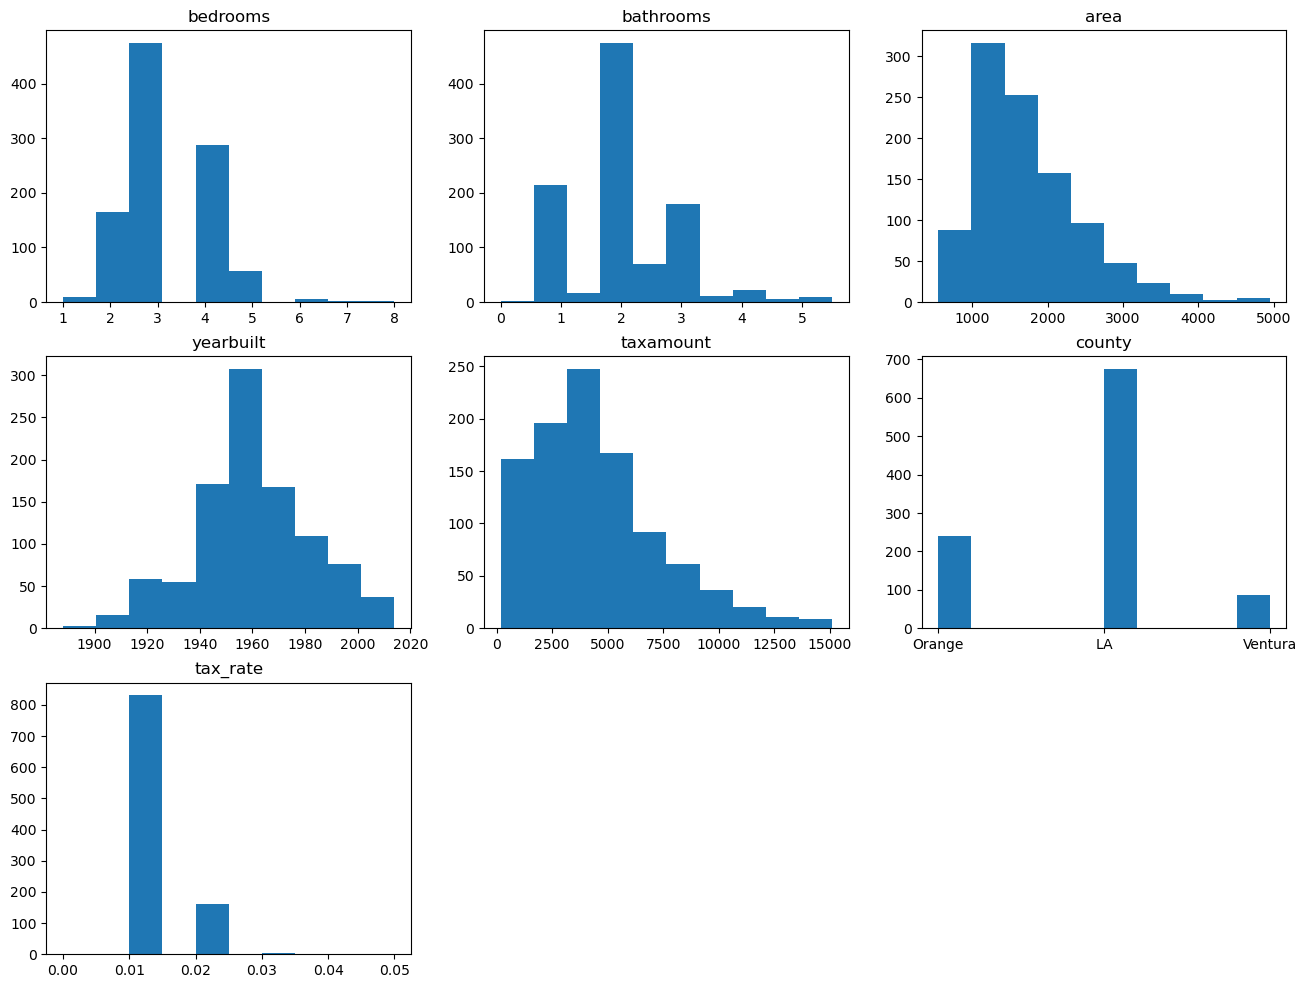

In [7]:
plt.figure(figsize=(16, 12))

# list of columns
cols = ['bedrooms','bathrooms','area','yearbuilt','taxamount','county','tax_rate']

for i, col in enumerate(cols):
    # i starts at 0, but plot no.s should start at 1
    plot_number = i+1
    
    # Create a subplot
    plt.subplot(3,3, plot_number)
    
    # Title with columns name
    plt.title(col)
    
    # Display histogram for column
    tr_sub[col].hist(grid=False, bins=10)
    
    # Hide gridlines
    plt.grid(False)

### 3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [8]:
# Create the correlation matrix for all exams.

tr_sub_corr = tr_sub.drop(columns=['taxvalue']).corr()
tr_sub_corr

,bedrooms,bathrooms,area,yearbuilt,taxamount,tax_rate
bedrooms,1.000000,0.557747,0.599477,0.343533,0.224195,-0.070008
bathrooms,0.557747,1.000000,0.794168,0.508563,0.458041,-0.117794
area,0.599477,0.794168,1.000000,0.429707,0.530414,-0.122090
yearbuilt,0.343533,0.508563,0.429707,1.000000,0.271234,0.003211
taxamount,0.224195,0.458041,0.530414,0.271234,1.000000,-0.249470
tax_rate,-0.070008,-0.117794,-0.122090,0.003211,-0.249470,1.000000


In [9]:
def plot_variable_pairs(tr_sub):
    # We can drop the redundant information in the upper right half of the chart if we like.
    sns.pairplot(data=tr_sub.drop(columns='taxvalue'), corner=True, kind='reg')
    return plt.show()

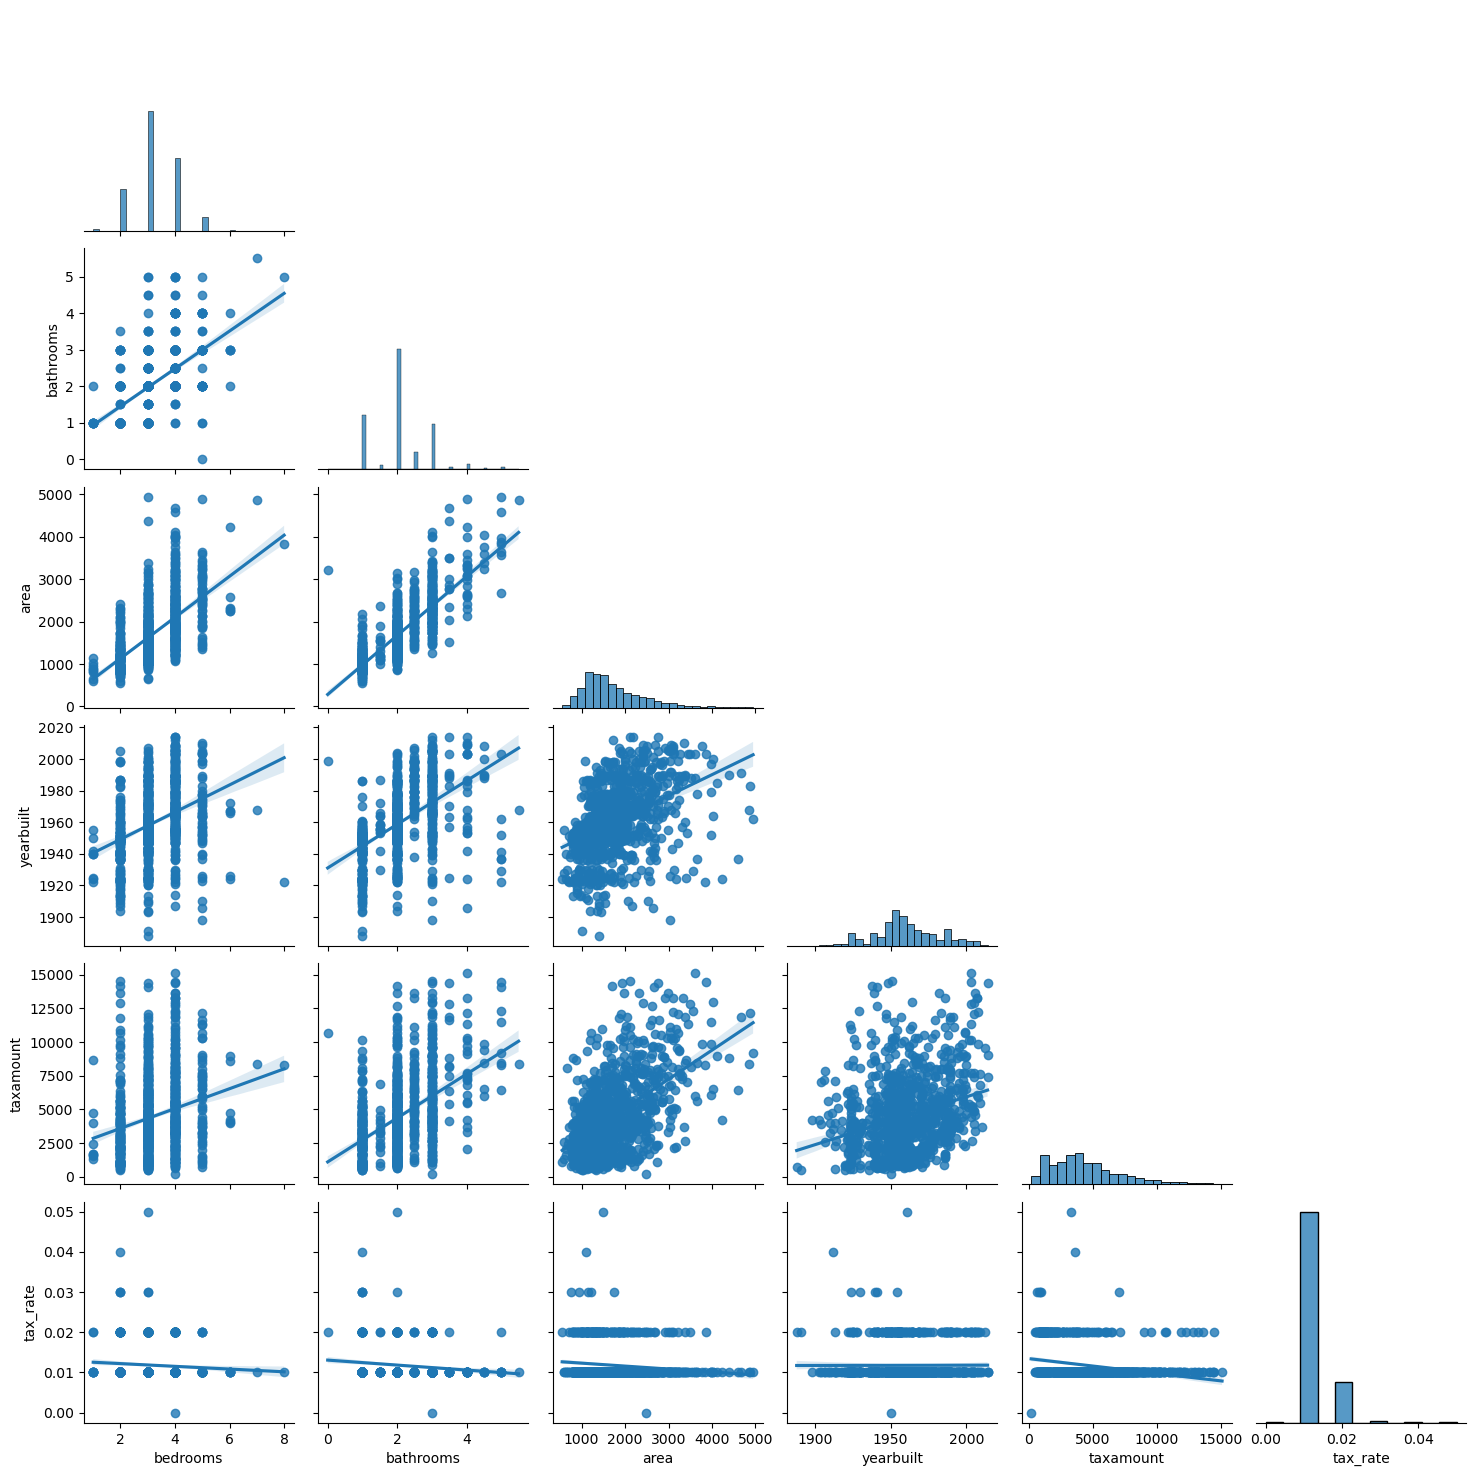

In [10]:
plot_variable_pairs(tr_sub)

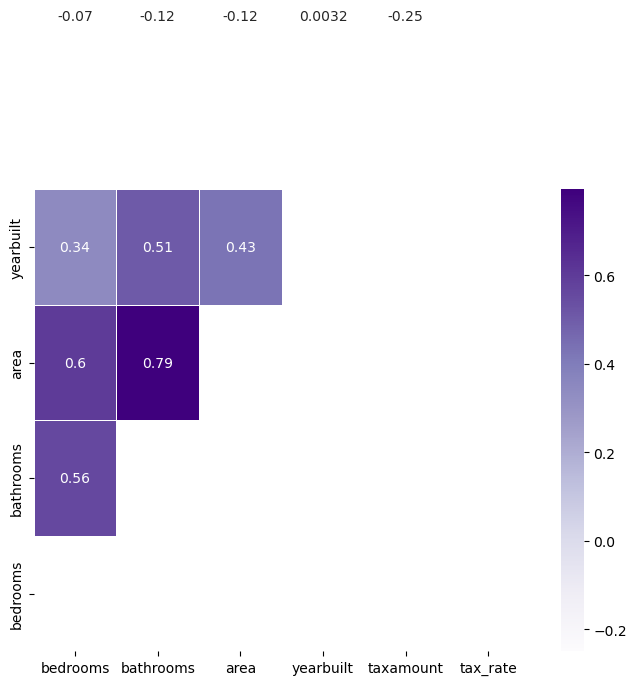

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(tr_sub_corr, cmap='Purples', annot=True, linewidth=0.5, mask= np.triu(tr_sub_corr))
plt.ylim(0, 4)

plt.show()

In [12]:
# Use a scipy stats function pearsonr to calculate the correlation coefficient and the p-value.

r, p_value = pearsonr(tr_sub.bedrooms, tr_sub.taxvalue)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')


Correlation Coefficient: 0.22605028666955101
P-value: 4.716630442100821e-13


In [13]:
# Since my variables are not normally distributed, I might choose Spearman instead.

tr_sub_spearman = tr_sub.drop(columns=['taxvalue']).corr(method='spearman')
tr_sub_spearman

,bedrooms,bathrooms,area,yearbuilt,taxamount,tax_rate
bedrooms,1.000000,0.566998,0.633199,0.414216,0.236539,-0.046877
bathrooms,0.566998,1.000000,0.798021,0.582490,0.429430,-0.108465
area,0.633199,0.798021,1.000000,0.487551,0.467999,-0.127832
yearbuilt,0.414216,0.582490,0.487551,1.000000,0.247867,0.004857
taxamount,0.236539,0.429430,0.467999,0.247867,1.000000,-0.334515
tax_rate,-0.046877,-0.108465,-0.127832,0.004857,-0.334515,1.000000


In [14]:
# Use a scipy stats function pearsonr to calculate the correlation coefficient and the p-value.

r, p_value = pearsonr(tr_sub.bedrooms, tr_sub.taxvalue)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')

Correlation Coefficient: 0.22605028666955101
P-value: 4.716630442100821e-13


In [15]:
# Since my variables are not normally distributed, I might choose Spearman instead.

tr_spearman = tr_sub.drop(columns=['taxvalue']).corr(method='spearman')
tr_spearman

,bedrooms,bathrooms,area,yearbuilt,taxamount,tax_rate
bedrooms,1.000000,0.566998,0.633199,0.414216,0.236539,-0.046877
bathrooms,0.566998,1.000000,0.798021,0.582490,0.429430,-0.108465
area,0.633199,0.798021,1.000000,0.487551,0.467999,-0.127832
yearbuilt,0.414216,0.582490,0.487551,1.000000,0.247867,0.004857
taxamount,0.236539,0.429430,0.467999,0.247867,1.000000,-0.334515
tax_rate,-0.046877,-0.108465,-0.127832,0.004857,-0.334515,1.000000


In [16]:
# Use a scipy stats function spearmanr to calculate the correlation coefficient and the p-value.

r, p_value = spearmanr(tr_sub.bedrooms, tr_sub.taxvalue)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')


Correlation Coefficient: 0.23917132079892775
P-value: 1.783889130642984e-14


### 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [17]:
def plot_categorical_and_continuous_vars(df, cat_var, cont_var):

    # Boxplot
    plt.figure(figsize=(8,6))
    sns.boxplot(x=cat_var, y=cont_var, data=df)
    plt.title(f"{cat_var} vs. {cont_var} (Boxplot)")
    plt.show()

    # Violin plot
    plt.figure(figsize=(8,6))
    sns.violinplot(x=cat_var, y=cont_var, data=df)
    plt.title(f"{cat_var} vs. {cont_var} (Violin plot)")
    plt.show()

    # Swarm plot
    plt.figure(figsize=(8,6))
    sns.swarmplot(x=cat_var, y=cont_var, data=df)
    plt.title(f"{cat_var} vs. {cont_var} (Swarm plot)")
    plt.show()


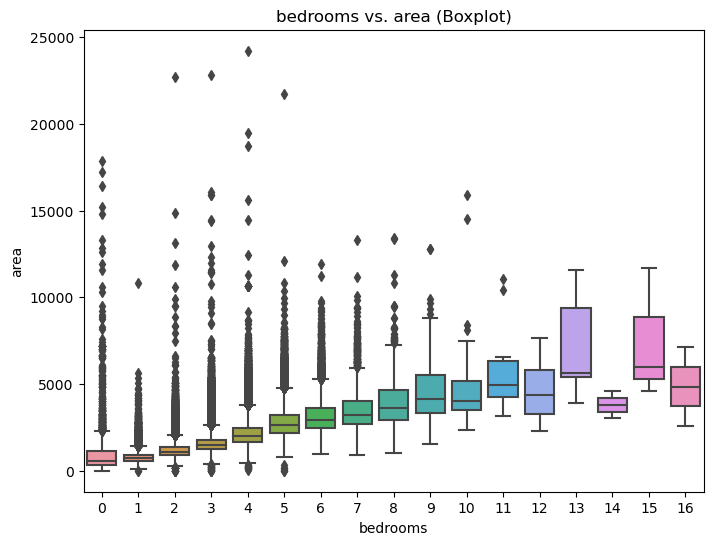

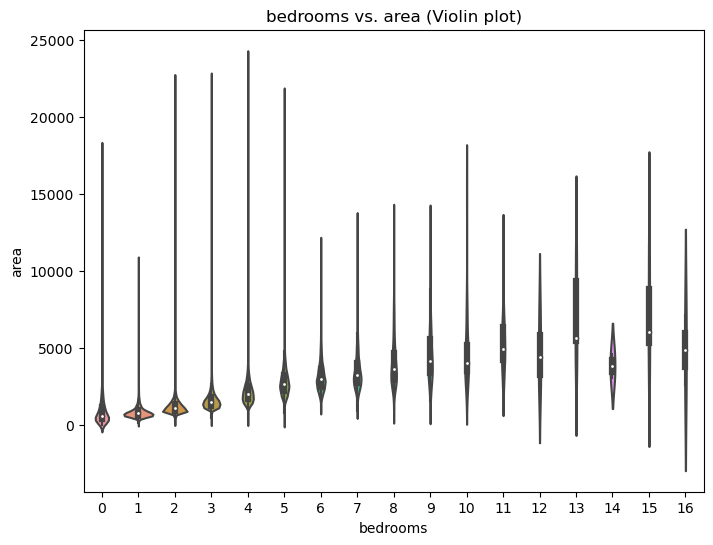

In [ ]:
cat_var = ['bedrooms', 'bathrooms','county']
cont_var = ['area','yearbuilt','taxamount','tax_rate']

for cat_col in cat_var:
    for cont_col in cont_var:
        plot_categorical_and_continuous_vars(df, cat_col, cont_col)

In [ ]:
plot_categorical_and_continuous_vars(df=tr_sub, cat_var='county', cont_var='yearbuilt')

### 5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

In [ ]:
cat_var = ['bedrooms','bathrooms','county']
cont_var = ['area','yearbuilt','taxamount','tax_rate']

In [ ]:
e.plot_categorical_and_continuous_vars(tr_sub, cat_var, cont_var)

### 6. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

### 7. Come up with some initial hypotheses based on your goal of predicting property value.

In [ ]:
Property values are positively correlated with the square footage of the property, the number of bedrooms and bathrooms, and the location of the property.
Property values are negatively correlated with the age of the property.
Properties located in areas with high population density or high crime rates may have lower property values.
Properties with a larger lot size may have higher property values.
Properties with more amenities (e.g. swimming pool, garage, etc.) may have higher property values.
Properties located near schools, shopping centers, or other amenities may have higher property values.

### 8. Visualize all combinations of variables in some way.

### 9. Run the appropriate statistical tests where needed.

### 10. What independent variables are correlated with the dependent variable, home value?

### 11. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

### 12. Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

### 13. Explore your dataset with any other visualizations you think will be helpful.